<a href="https://colab.research.google.com/github/open-mmlab/mmpose/blob/master/demo/MMPose_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMPose Tutorial

Welcome to MMPose colab tutorial! In this tutorial, we will show you how to
- perform inference with an MMPose model
- train a new mmpose model with your own datasets

Let's start!

## Install MMPose

We recommend to use a conda environment to install mmpose and its dependencies. And compilers `nvcc` and `gcc` are required.

In [ ]:
# check NVCC version
!nvcc -V

# check GCC version
!gcc --version

# check python in conda environment
!which python

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/usr/local/bin/python


In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
%pip install torch==1.10.0+cu111 torchvision==0.11.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
%pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# install mmdet for inference demo
%pip install mmdet

# clone mmpose repo
%rm -rf mmpose
!git clone https://github.com/open-mmlab/mmpose.git
%cd mmpose

# install mmpose dependencies
%pip install -r requirements.txt

# install mmpose in develop mode
%pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 kB 3.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.1 MB/s eta 0:00:00
Cloning into 'mmpose'...
remote: Enumerating objects: 26225, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 26225 (delta 33), reused 67 (delta 28), pack-reused 26128
Receiving objects: 100% (26225/26225), 28.06 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (18673/18673), done.
/content/mmpose
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━

In [ ]:
# Check Pytorch installation
import torch, torchvision

print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose

print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 2.0.0+cu118 True
torchvision version: 0.15.1+cu118


/usr/local/lib/python3.9/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


ModuleNotFoundError: ignored

## Inference with an MMPose model

MMPose provides high level APIs for model inference and training.

In [ ]:
pip install -U numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.10.0+cu111 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth


  0%|          | 0.00/243M [00:00<?, ?B/s]

load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/hub/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

(17, 3)


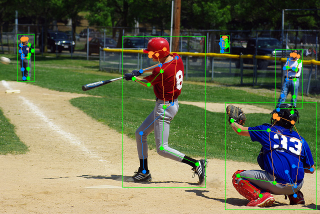

In [ ]:
import cv2
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector

local_runtime = False

try:
    from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
    local_runtime = True

pose_config = 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint, device='cuda')
# initialize detector
det_model = init_detector(det_config, det_checkpoint, device='cuda')

img = 'tests/data/coco/000000196141.jpg'

# inference detection
mmdet_results = inference_detector(det_model, img)

# extract person (COCO_ID=1) bounding boxes from the detection results
person_results = process_mmdet_results(mmdet_results, cat_id=1)


# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(
    pose_model,
    img,
    person_results,
    bbox_thr=0.3,
    format='xyxy',
    dataset=pose_model.cfg.data.test.type)

print(pose_results[0]['keypoints'].shape)

# show pose estimation results
vis_result = vis_pose_result(
    pose_model,
    img,
    pose_results,
    dataset=pose_model.cfg.data.test.type,
    show=False)
# reduce image size
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)

if local_runtime:
    from IPython.display import Image, display
    import tempfile
    import os.path as osp
    with tempfile.TemporaryDirectory() as tmpdir:
        file_name = osp.join(tmpdir, 'pose_results.png')
        cv2.imwrite(file_name, vis_result)
        display(Image(file_name))
else:
    cv2_imshow(vis_result)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

train_videos = pickle.load(open("/content/drive/My Drive/KTH/data/train.p", "rb"))
valid_videos = pickle.load(open("/content/drive/My Drive/KTH/data/dev.p", "rb"))
test_videos = pickle.load(open("/content/drive/My Drive/KTH/data/test.p", "rb"))

In [ ]:
TRAIN_PATHS = train_videos
VAL_PATHS = valid_videos
TEST_PATHS = test_videos


In [ ]:
pose_results, returned_outputs = inference_top_down_pose_model(
    pose_model,
    img,
    person_results,
    bbox_thr=0.3,
    format='xyxy',
    dataset= TRAIN_PATHS)


In [ ]:
import cv2
import numpy as np

# Initialize the detection model

pose_model = init_pose_model(pose_config, pose_checkpoint, device='cuda')
# initialize detector
det_model = init_detector(det_config, det_checkpoint, device='cuda')
train_poses = []

i = 0
for video_dict in TRAIN_PATHS:
    print(i)
    frames = video_dict['frames']

    pose_landmarks = []

    for j in range(0, len(frames), 10):
        frame = frames[j]

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run object detection on the frame
        mmdet_results = inference_detector(det_model, frame)

        # Extract person (COCO_ID=1) bounding boxes from the detection results
        person_results = process_mmdet_results(mmdet_results, cat_id=1)

        # Infer pose estimation on the frame
        pose_results, returned_outputs = inference_top_down_pose_model(
            pose_model,
            frame,
            person_results,
            bbox_thr=0.3,
            format='xyxy',
            dataset=pose_model.cfg.data.test.type)

        if not pose_results:
            pose_landmarks.append(np.zeros((17, 2), dtype=np.float32))
            continue

        pose_landmarks.append(pose_results[0]['keypoints'][:,:2])

    train_poses.append(np.array(pose_landmarks))
    i = i + 1


load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth
load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


In [ ]:
!pip uninstall numpy
!pip install numpy


Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.9
    /usr/local/lib/python3.9/dist-packages/numpy-1.21.6.dist-info/*
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.9/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.21.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1

In [ ]:
train_videos = pickle.load(open("/content/drive/My Drive/KTH_Private/train.p", "rb"))
valid_videos = pickle.load(open("/content/drive/My Drive/KTH_Private/dev.p", "rb"))
test_videos = pickle.load(open("/content/drive/My Drive/KTH_Private/test.p", "rb"))

In [ ]:
print(len(train_videos))
print(len(train_labels))

191
570


In [ ]:
TRAIN_PATHS = train_videos
VAL_PATHS = valid_videos
TEST_PATHS = test_videos

In [ ]:
pose_model = init_pose_model(pose_config, pose_checkpoint, device='cuda')
# initialize detector
det_model = init_detector(det_config, det_checkpoint, device='cuda')
val_poses = []

i = 0
for video_dict in VAL_PATHS:
    print(i)
    frames = video_dict['frames']

    pose_landmarks = []

    for j in range(0, len(frames), 10):
        frame = frames[j]

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run object detection on the frame
        mmdet_results = inference_detector(det_model, frame)

        # Extract person (COCO_ID=1) bounding boxes from the detection results
        person_results = process_mmdet_results(mmdet_results, cat_id=1)

        # Infer pose estimation on the frame
        pose_results, returned_outputs = inference_top_down_pose_model(
            pose_model,
            frame,
            person_results,
            bbox_thr=0.3,
            format='xyxy',
            dataset=pose_model.cfg.data.test.type)

        if not pose_results:
            pose_landmarks.append(np.zeros((17, 2), dtype=np.float32))
            continue

        pose_landmarks.append(pose_results[0]['keypoints'][:,:2])

    val_poses.append(np.array(pose_landmarks))
    i = i + 1


load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth
load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191


In [ ]:
import pickle
import shutil
with open("Val_cut", "wb") as fp:   #Pickling
  pickle.dump(val_poses, fp)
shutil.copy("Val_cut","/content/drive/MyDrive/")

'/content/drive/MyDrive/Val_cut'

In [ ]:
print(train[0].shape)

(35, 17, 2)


In [ ]:
pose_model = init_pose_model(pose_config, pose_checkpoint, device='cuda')
# initialize detector
det_model = init_detector(det_config, det_checkpoint, device='cuda')
test_poses = []
import numpy as np
i = 0
for video_dict in TEST_PATHS:
    print(i)
    frames = video_dict['frames']

    pose_landmarks = []

    for j in range(0, len(frames), 10):
        frame = frames[j]

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run object detection on the frame
        mmdet_results = inference_detector(det_model, frame)

        # Extract person (COCO_ID=1) bounding boxes from the detection results
        person_results = process_mmdet_results(mmdet_results, cat_id=1)

        # Infer pose estimation on the frame
        pose_results, returned_outputs = inference_top_down_pose_model(
            pose_model,
            frame,
            person_results,
            bbox_thr=0.3,
            format='xyxy',
            dataset=pose_model.cfg.data.test.type)

        if not pose_results:
            pose_landmarks.append(np.zeros((17, 2), dtype=np.float32))
            continue

        pose_landmarks.append(pose_results[0]['keypoints'][:,:2])

    test_poses.append(np.array(pose_landmarks))
    i = i + 1


In [ ]:
train_labels = []
for video in train_videos:
  train_labels.append(video['category'])
print(len(train_labels))
# train = train_poses


val_labels = []
for video in valid_videos:
  val_labels.append(video['category'])
print(len(val_labels))
# val = val_poses
test_videos = test_videos
test_labels = []
for video in test_videos:
  test_labels.append(video['category'])
print(len(test_labels))

# test = test_poses

191
192
216


In [ ]:
with open("/content/drive/MyDrive/HRNET/Train_cut", "rb") as fp:   # Unpickling
  train = pickle.load(fp)

with open("/content/drive/MyDrive/HRNET/Val_cut", "rb") as fp:   # Unpickling
  val = pickle.load(fp)

with open("/content/drive/MyDrive/HRNET/Test_cut", "rb") as fp:   # Unpickling
  test = pickle.load(fp)

In [ ]:
import numpy as np
import random
from tqdm import tqdm
import scipy.ndimage.interpolation as inter
from scipy.signal import medfilt
from scipy.spatial.distance import cdist
from keras.regularizers import l2

from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.layers.core import *
from tensorflow.keras.callbacks import *
from keras.layers.convolutional import *
import tensorflow as tf

import numpy as np
import math
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import glob
import gc

from tqdm import tqdm
import pickle

from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.layers.core import *
from keras.layers.convolutional import *
from keras import backend as K
import keras
import tensorflow as tf

#Initialize the setting
random.seed(1234)

class Config():
    def __init__(self):
        self.frame_l = 30 # the length of frames
        self.joint_n = 17 # the number of joints
        self.joint_d = 2 # the dimension of joints
        self.clc_num = 6 # the number of class
        self.feat_d = 136
        self.filters = 64


# Temple resizing function
def zoom(p,target_l=64,joints_num=33,joints_dim=2):
    l = p.shape[0]
    p_new = np.empty([target_l,joints_num,joints_dim])
    for m in range(joints_num):
        for n in range(joints_dim):
            p[:,m,n] = medfilt(p[:,m,n],3)
            p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
    return p_new

# Calculate JCD feature
def norm_scale(x):
    return (x-np.mean(x))/np.mean(x)

def get_CG(p,C):
    M = []
    iu = np.triu_indices(C.joint_n,1,C.joint_n)
    for f in range(C.frame_l):
        d_m = cdist(p[f],p[f],'euclidean')
        d_m = d_m[iu]
        M.append(d_m)
    M = np.stack(M)
    M = norm_scale(M)
    return M

# Genrate dataset
# def data_generator(T,C,le):
#     X_0 = []
#     X_1 = []
#     Y = []
#     for i in tqdm(range(len(T['pose']))):
#         p = np.copy(T['pose'][i])
#         p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)

#         label = np.zeros(C.clc_num)
#         label[le.transform(T['label'])[i]-1] = 1

#         M = get_CG(p,C)

#         X_0.append(M)
#         X_1.append(p)
#         Y.append(label)

#     X_0 = np.stack(X_0)
#     X_1 = np.stack(X_1)
#     Y = np.stack(Y)
#     return X_0,X_1,Y

def data_generator(T,C,le,labels):
    X_0 = []
    X_1 = []
    Y = []
    for i in tqdm(range(len(T))):
        p = np.copy(T[i])
        p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)
        label = np.zeros(C.clc_num)
        print(len(le.transform(labels)))
        label[le.transform(labels)[i]-1] = 1

        M = get_CG(p,C)

        X_0.append(M)
        X_1.append(p)
        Y.append(label)

    X_0 = np.stack(X_0)
    X_1 = np.stack(X_1)
    Y = np.stack(Y)
    return X_0,X_1,Y




#Building the model
def poses_diff(x):
    H, W = x.get_shape()[1],x.get_shape()[2]
    x = tf.subtract(x[:,1:,...],x[:,:-1,...])
    x = tf.image.resize(x,size=[H,W])
    return x

def pose_motion(P,frame_l):
    P_diff_slow = Lambda(lambda x: poses_diff(x))(P)
    P_diff_slow = Reshape((frame_l,-1))(P_diff_slow)
    P_fast = Lambda(lambda x: x[:,::2,...])(P)
    P_diff_fast = Lambda(lambda x: poses_diff(x))(P_fast)
    P_diff_fast = Reshape((int(frame_l/2),-1))(P_diff_fast)
    return P_diff_slow,P_diff_fast

def c1D(x,filters,kernel):
    x = Conv1D(filters, kernel_size=kernel,padding='same',use_bias=False, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def block(x,filters):
    x = c1D(x,filters,3)
    x = c1D(x,filters,3)
    return x

def d1D(x,filters):
    x = Dense(filters,use_bias=False, kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def build_FM(frame_l=30,joint_n=33,joint_d=2,feat_d=231,filters=16):
    M = Input(shape=(frame_l,feat_d))
    P = Input(shape=(frame_l,joint_n,joint_d))

    diff_slow,diff_fast = pose_motion(P,frame_l)

    x = c1D(M,filters*2,1)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,3)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,1)
    x = MaxPooling1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x_d_slow = c1D(diff_slow,filters*2,1)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,3)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,1)
    x_d_slow = MaxPool1D(2)(x_d_slow)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)

    x_d_fast = c1D(diff_fast,filters*2,1)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,3)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,1)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)

    x = concatenate([x,x_d_slow,x_d_fast])
    x = block(x,filters*2)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x = block(x,filters*4)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x = block(x,filters*8)
    x = SpatialDropout1D(0.1)(x)

    return Model(inputs=[M,P],outputs=x)


def build_DD_Net(C):
    M = Input(name='M', shape=(C.frame_l,C.feat_d))
    P = Input(name='P', shape=(C.frame_l,C.joint_n,C.joint_d))

    FM = build_FM(C.frame_l,C.joint_n,C.joint_d,C.feat_d,C.filters)

    x = FM([M,P])

    x = GlobalMaxPool1D()(x)

    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = Dense(C.clc_num, activation='softmax')(x)

    ######################Self-supervised part
    model = Model(inputs=[M,P],outputs=x)
    return model


#Test in real time
# def data_generator_rt(T,C):
#     X_0 = []
#     X_1 = []

#     T = np.expand_dims(T, axis = 0)
#     for i in tqdm(range(len(T))):
#         p = np.copy(T[i])
#         p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)

#         M = get_CG(p,C)

#         X_0.append(M)
#         X_1.append(p)

#     X_0 = np.stack(X_0)
#     X_1 = np.stack(X_1)

#     return X_0,X_1

In [ ]:
C = Config()
DD_Net = build_DD_Net(C)
DD_Net.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 M (InputLayer)                 [(None, 30, 136)]    0           []                               
                                                                                                  
 P (InputLayer)                 [(None, 30, 17, 2)]  0           []                               
                                                                                                  
 model_2 (Functional)           (None, 3, 512)       1719808     ['M[0][0]',                      
                                                                  'P[0][0]']                      
                                                                                                  
 global_max_pooling1d_1 (Global  (None, 512)         0           ['model_2[0][0]']          

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)


X_0,X_1,Y = data_generator(train,C,le, train_labels)
X_val_0,X_val_1,Y_val = data_generator(val,C, le, val_labels)

  0%|          | 0/191 [00:00<?, ?it/s]<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: Deprecati

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 99%|█████████▉| 189/191 [00:01<00:00, 169.52it/s]<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59

191
191
191
191


  0%|          | 0/192 [00:00<?, ?it/s]<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: Deprecati

192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 19%|█▉        | 36/192 [00:00<00:01, 152.67it/s]<ipython-input-17-d2a85bf2500a>:59:

192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)


X_0,X_1,Y = data_generator(train,C,le, train_labels)
X_val_0,X_val_1,Y_val = data_generator(val,C, le, val_labels)

  0%|          | 0/191 [00:00<?, ?it/s]<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: Deprecati

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 14%|█▎        | 26/191 [00:00<00:01, 115.10it/s]<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59:

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 26%|██▌       | 50/191 [00:00<00:01, 111.25it/s]<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59:

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

191
191
191
191
191


  0%|          | 0/192 [00:00<?, ?it/s]<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: Deprecati

192
192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 11%|█▏        | 22/192 [00:00<00:01, 90.33it/s] <ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59:

192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 17%|█▋        | 32/192 [00:00<00:01, 92.73it/s]<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: 

192
192
192
192
192
192
192
192
192

<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 22%|██▏       | 42/192 [00:00<00:01, 93.08it/s]<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: 


192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 27%|██▋       | 52/192 [00:00<00:01, 92.01it/s]<ipython-input-17-d2a85bf2500a>:59: 

192
192
192
192
192
192
192
192

<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 32%|███▏      | 62/192 [00:00<00:01, 93.91it/s]<ipython-input-17-d2a85bf2500a>:59: 


192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 38%|███▊      | 72/192 [00:00<00:01, 92.31it/s]<ipython-input-17-d2a85bf2500a>:59: 

192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192
192
192
192
192
192
192

<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `


192
192
192
192
192
192
192
192

<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `


192
192
192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 89%|████████▉ | 171/192 [00:01<00:00, 93.56it/s] <ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59

192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 94%|█████████▍| 181/192 [00:01<00:00, 91.67it/s]<ipython-input-17-d2a85bf2500a>:59:

192
192
192
192
192
192
192
192
192
192


<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-17-d2a85bf2500a>:59: DeprecationWarning: Please use `zoom` from the `

192
192
192
192


In [ ]:
lr = 1e-3
DD_Net.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(lr),metrics=['accuracy'])
lrScheduler = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, cooldown=5, min_lr=1e-5)
history = DD_Net.fit([X_0,X_1],Y,
                    batch_size=len(Y),
                    epochs=1200,
                    verbose=True,
                    shuffle=True,
                    callbacks=[lrScheduler],
                    validation_data=([X_val_0,X_val_1],Y_val)
                    )

Epoch 1/1200
1/1 [==============================] - 18s 18s/step - loss: 28.2266 - accuracy: 0.1571 - val_loss: 27.3503 - val_accuracy: 0.1719 - lr: 0.0010
Epoch 2/1200
1/1 [==============================] - 0s 98ms/step - loss: 27.5470 - accuracy: 0.2932 - val_loss: 27.3059 - val_accuracy: 0.1719 - lr: 0.0010
Epoch 3/1200
1/1 [==============================] - 0s 131ms/step - loss: 27.1212 - accuracy: 0.4398 - val_loss: 27.2952 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 4/1200
1/1 [==============================] - 0s 106ms/step - loss: 26.8966 - accuracy: 0.5497 - val_loss: 27.3336 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 5/1200
1/1 [==============================] - 0s 89ms/step - loss: 26.5932 - accuracy: 0.5654 - val_loss: 27.2870 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 6/1200
1/1 [==============================] - 0s 88ms/step - loss: 26.3354 - accuracy: 0.6335 - val_loss: 27.2242 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 7/1200
1/1 [==============================] - 0s 100ms/s

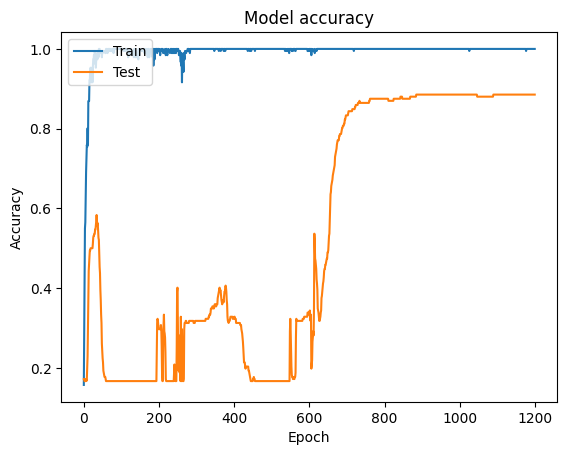

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
X_test_0,X_test_1,Y_test = data_generator(test, C , le, test_labels)

  0%|          | 0/216 [00:00<?, ?it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: Deprecati

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


In [ ]:
metrics = DD_Net.evaluate([X_test_0, X_test_1], Y_test, verbose=0)

# print the evaluation results
print("Validation loss:", metrics[0])
print("Validation accuracy:", metrics[1])

Validation loss: 0.9010809659957886
Validation accuracy: 0.875


In [ ]:
DD_Net.save("DD_Net_HRNet_heavy.h5")
import shutil

shutil.copy("DD_Net_HRNet_heavy.h5","/content/drive/MyDrive/")

'/content/drive/MyDrive/DD_Net_HRNet_heavy.h5'

In [ ]:
class Config():
    def __init__(self):
        self.frame_l = 30 # the length of frames
        self.joint_n = 17 # the number of joints
        self.joint_d = 2 # the dimension of joints
        self.clc_num = 6 # the number of class
        self.feat_d = 136
        self.filters = 32

In [ ]:
C = Config()
DD_Net = build_DD_Net(C)
DD_Net.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 M (InputLayer)                 [(None, 30, 136)]    0           []                               
                                                                                                  
 P (InputLayer)                 [(None, 30, 17, 2)]  0           []                               
                                                                                                  
 model_6 (Functional)           (None, 3, 256)       439040      ['M[0][0]',                      
                                                                  'P[0][0]']                      
                                                                                                  
 global_max_pooling1d_3 (Global  (None, 256)         0           ['model_6[0][0]']          

In [ ]:
lr = 1e-3
DD_Net.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(lr),metrics=['accuracy'])
lrScheduler = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, cooldown=5, min_lr=1e-5)
history = DD_Net.fit([X_0,X_1],Y,
                    batch_size=len(Y),
                    epochs=1200,
                    verbose=True,
                    shuffle=True,
                    callbacks=[lrScheduler],
                    validation_data=([X_val_0,X_val_1],Y_val)
                    )

Epoch 1/1200
1/1 [==============================] - 9s 9s/step - loss: 2.2964 - accuracy: 0.1518 - val_loss: 1.6479 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 2/1200
1/1 [==============================] - 0s 64ms/step - loss: 2.0336 - accuracy: 0.2880 - val_loss: 1.6318 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 3/1200
1/1 [==============================] - 0s 74ms/step - loss: 1.7900 - accuracy: 0.3298 - val_loss: 1.6221 - val_accuracy: 0.1615 - lr: 0.0010
Epoch 4/1200
1/1 [==============================] - 0s 72ms/step - loss: 1.6185 - accuracy: 0.3613 - val_loss: 1.6167 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 5/1200
1/1 [==============================] - 0s 69ms/step - loss: 1.5693 - accuracy: 0.4188 - val_loss: 1.6088 - val_accuracy: 0.1771 - lr: 0.0010
Epoch 6/1200
1/1 [==============================] - 0s 70ms/step - loss: 1.6118 - accuracy: 0.3613 - val_loss: 1.6053 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 7/1200
1/1 [==============================] - 0s 64ms/step - loss: 1.551

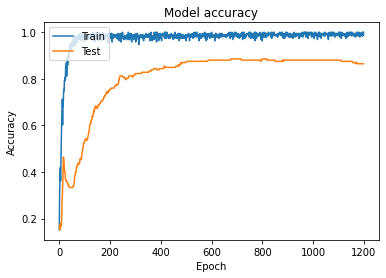

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
metrics = DD_Net.evaluate([X_test_0, X_test_1], Y_test, verbose=0)

# print the evaluation results
print("Validation loss:", metrics[0])
print("Validation accuracy:", metrics[1])

Validation loss: 0.4007229506969452
Validation accuracy: 0.8935185074806213


In [ ]:
DD_Net.save("DD_Net_HRNet_medium.h5")

In [ ]:
import shutil

shutil.copy("DD_Net_HRNet_medium.h5","/content/drive/MyDrive/")

'/content/drive/MyDrive/DD_Net_HRNet_medium.h5'

In [ ]:
class Config():
    def __init__(self):
        self.frame_l = 30 # the length of frames
        self.joint_n = 17 # the number of joints
        self.joint_d = 2 # the dimension of joints
        self.clc_num = 6 # the number of class
        self.feat_d = 136
        self.filters = 16

In [ ]:
C = Config()
DD_Net = build_DD_Net(C)
DD_Net.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 M (InputLayer)                 [(None, 30, 136)]    0           []                               
                                                                                                  
 P (InputLayer)                 [(None, 30, 17, 2)]  0           []                               
                                                                                                  
 model_8 (Functional)           (None, 3, 128)       114304      ['M[0][0]',                      
                                                                  'P[0][0]']                      
                                                                                                  
 global_max_pooling1d_4 (Global  (None, 128)         0           ['model_8[0][0]']          

In [ ]:
lr = 1e-3
DD_Net.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(lr),metrics=['accuracy'])
lrScheduler = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, cooldown=5, min_lr=1e-5)
history = DD_Net.fit([X_0,X_1],Y,
                    batch_size=len(Y),
                    epochs=1200,
                    verbose=True,
                    shuffle=True,
                    callbacks=[lrScheduler],
                    validation_data=([X_val_0,X_val_1],Y_val)
                    )

Epoch 1/1200
1/1 [==============================] - 7s 7s/step - loss: 2.2337 - accuracy: 0.2356 - val_loss: 1.7288 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 2/1200
1/1 [==============================] - 0s 91ms/step - loss: 2.1156 - accuracy: 0.2618 - val_loss: 1.6917 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 3/1200
1/1 [==============================] - 0s 89ms/step - loss: 2.0013 - accuracy: 0.2565 - val_loss: 1.6690 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 4/1200
1/1 [==============================] - 0s 94ms/step - loss: 1.8911 - accuracy: 0.2984 - val_loss: 1.6501 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 5/1200
1/1 [==============================] - 0s 92ms/step - loss: 1.8086 - accuracy: 0.2880 - val_loss: 1.6301 - val_accuracy: 0.1927 - lr: 0.0010
Epoch 6/1200
1/1 [==============================] - 0s 133ms/step - loss: 1.7305 - accuracy: 0.3455 - val_loss: 1.6119 - val_accuracy: 0.2240 - lr: 0.0010
Epoch 7/1200
1/1 [==============================] - 0s 92ms/step - loss: 1.47

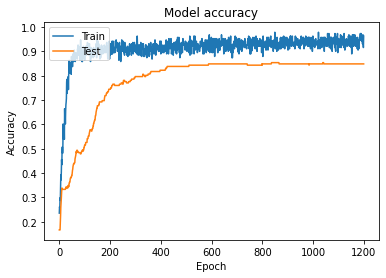

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
metrics = DD_Net.evaluate([X_test_0, X_test_1], Y_test, verbose=0)

# print the evaluation results
print("Validation loss:", metrics[0])
print("Validation accuracy:", metrics[1])

Validation loss: 0.4856085479259491
Validation accuracy: 0.8333333134651184


In [ ]:
DD_Net.save("DD_Net_HRNet_lite.h5")
shutil.copy("DD_Net_HRNet_lite.h5","/content/drive/MyDrive/")

'/content/drive/MyDrive/DD_Net_HRNet_lite.h5'

CONCAT TRAIN AND VAL


In [ ]:
new_train = train + val
new_train_labels = train_labels + val_labels
print(len(new_train))
print(len(new_train_labels))

383
383


In [ ]:
import numpy as np
import random
from tqdm import tqdm
import scipy.ndimage.interpolation as inter
from scipy.signal import medfilt
from scipy.spatial.distance import cdist
from keras.regularizers import l2

from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.layers.core import *
from tensorflow.keras.callbacks import *
from keras.layers.convolutional import *
import tensorflow as tf

import numpy as np
import math
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import glob
import gc

from tqdm import tqdm
import pickle

from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.layers.core import *
from keras.layers.convolutional import *
from keras import backend as K
import keras
import tensorflow as tf

#Initialize the setting
random.seed(1234)

class Config():
    def __init__(self):
        self.frame_l = 30 # the length of frames
        self.joint_n = 17 # the number of joints
        self.joint_d = 2 # the dimension of joints
        self.clc_num = 6 # the number of class
        self.feat_d = 136
        self.filters = 64


# Temple resizing function
def zoom(p,target_l=64,joints_num=33,joints_dim=2):
    l = p.shape[0]
    p_new = np.empty([target_l,joints_num,joints_dim])
    for m in range(joints_num):
        for n in range(joints_dim):
            p[:,m,n] = medfilt(p[:,m,n],3)
            p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
    return p_new

# Calculate JCD feature
def norm_scale(x):
    return (x-np.mean(x))/np.mean(x)

def get_CG(p,C):
    M = []
    iu = np.triu_indices(C.joint_n,1,C.joint_n)
    for f in range(C.frame_l):
        d_m = cdist(p[f],p[f],'euclidean')
        d_m = d_m[iu]
        M.append(d_m)
    M = np.stack(M)
    M = norm_scale(M)
    return M

# Genrate dataset
# def data_generator(T,C,le):
#     X_0 = []
#     X_1 = []
#     Y = []
#     for i in tqdm(range(len(T['pose']))):
#         p = np.copy(T['pose'][i])
#         p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)

#         label = np.zeros(C.clc_num)
#         label[le.transform(T['label'])[i]-1] = 1

#         M = get_CG(p,C)

#         X_0.append(M)
#         X_1.append(p)
#         Y.append(label)

#     X_0 = np.stack(X_0)
#     X_1 = np.stack(X_1)
#     Y = np.stack(Y)
#     return X_0,X_1,Y

def data_generator(T,C,le,labels):
    X_0 = []
    X_1 = []
    Y = []
    for i in tqdm(range(len(T))):
        p = np.copy(T[i])
        p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)
        label = np.zeros(C.clc_num)
        print(len(le.transform(labels)))
        label[le.transform(labels)[i]-1] = 1

        M = get_CG(p,C)

        X_0.append(M)
        X_1.append(p)
        Y.append(label)

    X_0 = np.stack(X_0)
    X_1 = np.stack(X_1)
    Y = np.stack(Y)
    return X_0,X_1,Y




#Building the model
def poses_diff(x):
    H, W = x.get_shape()[1],x.get_shape()[2]
    x = tf.subtract(x[:,1:,...],x[:,:-1,...])
    x = tf.image.resize(x,size=[H,W])
    return x

def pose_motion(P,frame_l):
    P_diff_slow = Lambda(lambda x: poses_diff(x))(P)
    P_diff_slow = Reshape((frame_l,-1))(P_diff_slow)
    P_fast = Lambda(lambda x: x[:,::2,...])(P)
    P_diff_fast = Lambda(lambda x: poses_diff(x))(P_fast)
    P_diff_fast = Reshape((int(frame_l/2),-1))(P_diff_fast)
    return P_diff_slow,P_diff_fast

def c1D(x,filters,kernel):
    x = Conv1D(filters, kernel_size=kernel,padding='same',use_bias=False, kernel_regularizer=l2(0.005))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def block(x,filters):
    x = c1D(x,filters,3)
    x = c1D(x,filters,3)
    return x

def d1D(x,filters):
    x = Dense(filters,use_bias=False, kernel_regularizer=l2(0.005))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def build_FM(frame_l=30,joint_n=33,joint_d=2,feat_d=231,filters=16):
    M = Input(shape=(frame_l,feat_d))
    P = Input(shape=(frame_l,joint_n,joint_d))

    diff_slow,diff_fast = pose_motion(P,frame_l)

    x = c1D(M,filters*2,1)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,3)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,1)
    x = MaxPooling1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x_d_slow = c1D(diff_slow,filters*2,1)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,3)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,1)
    x_d_slow = MaxPool1D(2)(x_d_slow)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)

    x_d_fast = c1D(diff_fast,filters*2,1)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,3)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,1)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)

    x = concatenate([x,x_d_slow,x_d_fast])
    x = block(x,filters*2)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x = block(x,filters*4)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x = block(x,filters*8)
    x = SpatialDropout1D(0.1)(x)

    return Model(inputs=[M,P],outputs=x)


def build_DD_Net(C):
    M = Input(name='M', shape=(C.frame_l,C.feat_d))
    P = Input(name='P', shape=(C.frame_l,C.joint_n,C.joint_d))

    FM = build_FM(C.frame_l,C.joint_n,C.joint_d,C.feat_d,C.filters)

    x = FM([M,P])

    x = GlobalMaxPool1D()(x)

    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = Dense(C.clc_num, activation='softmax')(x)

    ######################Self-supervised part
    model = Model(inputs=[M,P],outputs=x)
    return model


#Test in real time
# def data_generator_rt(T,C):
#     X_0 = []
#     X_1 = []

#     T = np.expand_dims(T, axis = 0)
#     for i in tqdm(range(len(T))):
#         p = np.copy(T[i])
#         p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)

#         M = get_CG(p,C)

#         X_0.append(M)
#         X_1.append(p)

#     X_0 = np.stack(X_0)
#     X_1 = np.stack(X_1)

#     return X_0,X_1

In [ ]:
class Config():
    def __init__(self):
        self.frame_l = 30 # the length of frames
        self.joint_n = 17 # the number of joints
        self.joint_d = 2 # the dimension of joints
        self.clc_num = 6 # the number of class
        self.feat_d = 136
        self.filters = 64

C = Config()
DD_Net = build_DD_Net(C)
DD_Net.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 M (InputLayer)                 [(None, 30, 136)]    0           []                               
                                                                                                  
 P (InputLayer)                 [(None, 30, 17, 2)]  0           []                               
                                                                                                  
 model_2 (Functional)           (None, 3, 512)       1719808     ['M[0][0]',                      
                                                                  'P[0][0]']                      
                                                                                                  
 global_max_pooling1d_1 (Global  (None, 512)         0           ['model_2[0][0]']          

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(new_train_labels)


X_0,X_1,Y = data_generator(new_train,C,le, new_train_labels)
X_val_0,X_val_1,Y_val = data_generator(test,C, le, test_labels)

  0%|          | 0/383 [00:00<?, ?it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: Deprecati

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


  8%|▊         | 32/383 [00:00<00:02, 148.62it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59:

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 17%|█▋        | 66/383 [00:00<00:01, 160.47it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59:

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 26%|██▌       | 99/383 [00:00<00:01, 154.93it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59:

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 35%|███▍      | 134/383 [00:00<00:01, 159.65it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 44%|████▍     | 169/383 [00:01<00:01, 164.57it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383
383


  0%|          | 0/216 [00:00<?, ?it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]


216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


 13%|█▎        | 29/216 [00:00<00:01, 138.31it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]


216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 56%|█████▌    | 120/216 [00:00<00:00, 137.75it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216


 70%|██████▉   | 151/216 [00:01<00:00, 140.04it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 84%|████████▍ | 181/216 [00:01<00:00, 138.50it/s]<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59

216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `

216
216
216


<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
<ipython-input-27-e0415779a1ec>:59: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
 97%|█████████▋| 209/216 [00:01<00:00, 135.54it/s]<ipython-input-27-e0415779a1ec>:59

216
216
216
216
216
216
216
216
216
216
216


In [ ]:
C = Config()
DD_Net = build_DD_Net(C)
DD_Net.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 M (InputLayer)                 [(None, 30, 136)]    0           []                               
                                                                                                  
 P (InputLayer)                 [(None, 30, 17, 2)]  0           []                               
                                                                                                  
 model_4 (Functional)           (None, 3, 512)       1719808     ['M[0][0]',                      
                                                                  'P[0][0]']                      
                                                                                                  
 global_max_pooling1d_2 (Global  (None, 512)         0           ['model_4[0][0]']          

In [ ]:
lr = 1e-3
DD_Net.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(lr),metrics=['accuracy'])
lrScheduler = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, cooldown=5, min_lr=1e-5)
history = DD_Net.fit([X_0,X_1],Y,
                    batch_size=len(Y),
                    epochs=1200,
                    verbose=True,
                    shuffle=True,
                    callbacks=[lrScheduler],
                    validation_data=([X_val_0,X_val_1],Y_val)
                    )

Epoch 1/1200
1/1 [==============================] - 20s 20s/step - loss: 15.2567 - accuracy: 0.1880 - val_loss: 14.5428 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 2/1200
1/1 [==============================] - 0s 104ms/step - loss: 14.4892 - accuracy: 0.3864 - val_loss: 14.7004 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 3/1200
1/1 [==============================] - 0s 80ms/step - loss: 14.1592 - accuracy: 0.5170 - val_loss: 14.8505 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 4/1200
1/1 [==============================] - 0s 77ms/step - loss: 14.0032 - accuracy: 0.5744 - val_loss: 14.9275 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 5/1200
1/1 [==============================] - 0s 70ms/step - loss: 13.6824 - accuracy: 0.6893 - val_loss: 14.9537 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 6/1200
1/1 [==============================] - 0s 71ms/step - loss: 13.6516 - accuracy: 0.6867 - val_loss: 14.9593 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 7/1200
1/1 [==============================] - 0s 86ms/ste

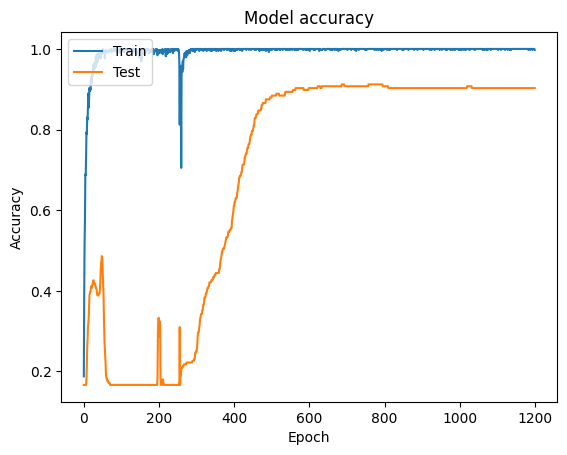

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
metrics = DD_Net.evaluate([X_test_0, X_test_1], Y_test, verbose=0)

# print the evaluation results
print("Validation loss:", metrics[0])
print("Validation accuracy:", metrics[1])

Validation loss: 1.2130627632141113
Validation accuracy: 0.9027777910232544


In [ ]:
DD_Net.save("HRNET_64_Reg_Val.h5")

In [ ]:
import numpy as np
import random
from tqdm import tqdm
import scipy.ndimage.interpolation as inter
from scipy.signal import medfilt
from scipy.spatial.distance import cdist
from keras.regularizers import l2

from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.layers.core import *
from tensorflow.keras.callbacks import *
from keras.layers.convolutional import *
import tensorflow as tf

import numpy as np
import math
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import glob
import gc

from tqdm import tqdm
import pickle

from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.layers.core import *
from keras.layers.convolutional import *
from keras import backend as K
import keras
import tensorflow as tf

#Initialize the setting
random.seed(1234)

class Config():
    def __init__(self):
        self.frame_l = 30 # the length of frames
        self.joint_n = 17 # the number of joints
        self.joint_d = 2 # the dimension of joints
        self.clc_num = 6 # the number of class
        self.feat_d = 136
        self.filters = 64


# Temple resizing function
def zoom(p,target_l=64,joints_num=33,joints_dim=2):
    l = p.shape[0]
    p_new = np.empty([target_l,joints_num,joints_dim])
    for m in range(joints_num):
        for n in range(joints_dim):
            p[:,m,n] = medfilt(p[:,m,n],3)
            p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
    return p_new

# Calculate JCD feature
def norm_scale(x):
    return (x-np.mean(x))/np.mean(x)

def get_CG(p,C):
    M = []
    iu = np.triu_indices(C.joint_n,1,C.joint_n)
    for f in range(C.frame_l):
        d_m = cdist(p[f],p[f],'euclidean')
        d_m = d_m[iu]
        M.append(d_m)
    M = np.stack(M)
    M = norm_scale(M)
    return M

# Genrate dataset
# def data_generator(T,C,le):
#     X_0 = []
#     X_1 = []
#     Y = []
#     for i in tqdm(range(len(T['pose']))):
#         p = np.copy(T['pose'][i])
#         p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)

#         label = np.zeros(C.clc_num)
#         label[le.transform(T['label'])[i]-1] = 1

#         M = get_CG(p,C)

#         X_0.append(M)
#         X_1.append(p)
#         Y.append(label)

#     X_0 = np.stack(X_0)
#     X_1 = np.stack(X_1)
#     Y = np.stack(Y)
#     return X_0,X_1,Y

def data_generator(T,C,le,labels):
    X_0 = []
    X_1 = []
    Y = []
    for i in tqdm(range(len(T))):
        p = np.copy(T[i])
        p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)
        label = np.zeros(C.clc_num)
        print(len(le.transform(labels)))
        label[le.transform(labels)[i]-1] = 1

        M = get_CG(p,C)

        X_0.append(M)
        X_1.append(p)
        Y.append(label)

    X_0 = np.stack(X_0)
    X_1 = np.stack(X_1)
    Y = np.stack(Y)
    return X_0,X_1,Y




#Building the model
def poses_diff(x):
    H, W = x.get_shape()[1],x.get_shape()[2]
    x = tf.subtract(x[:,1:,...],x[:,:-1,...])
    x = tf.image.resize(x,size=[H,W])
    return x

def pose_motion(P,frame_l):
    P_diff_slow = Lambda(lambda x: poses_diff(x))(P)
    P_diff_slow = Reshape((frame_l,-1))(P_diff_slow)
    P_fast = Lambda(lambda x: x[:,::2,...])(P)
    P_diff_fast = Lambda(lambda x: poses_diff(x))(P_fast)
    P_diff_fast = Reshape((int(frame_l/2),-1))(P_diff_fast)
    return P_diff_slow,P_diff_fast

def c1D(x,filters,kernel):
    x = Conv1D(filters, kernel_size=kernel,padding='same',use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def block(x,filters):
    x = c1D(x,filters,3)
    x = c1D(x,filters,3)
    return x

def d1D(x,filters):
    x = Dense(filters,use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def build_FM(frame_l=30,joint_n=33,joint_d=2,feat_d=231,filters=16):
    M = Input(shape=(frame_l,feat_d))
    P = Input(shape=(frame_l,joint_n,joint_d))

    diff_slow,diff_fast = pose_motion(P,frame_l)

    x = c1D(M,filters*2,1)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,3)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,1)
    x = MaxPooling1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x_d_slow = c1D(diff_slow,filters*2,1)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,3)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,1)
    x_d_slow = MaxPool1D(2)(x_d_slow)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)

    x_d_fast = c1D(diff_fast,filters*2,1)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,3)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,1)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)

    x = concatenate([x,x_d_slow,x_d_fast])
    x = block(x,filters*2)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x = block(x,filters*4)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x = block(x,filters*8)
    x = SpatialDropout1D(0.1)(x)

    return Model(inputs=[M,P],outputs=x)


def build_DD_Net(C):
    M = Input(name='M', shape=(C.frame_l,C.feat_d))
    P = Input(name='P', shape=(C.frame_l,C.joint_n,C.joint_d))

    FM = build_FM(C.frame_l,C.joint_n,C.joint_d,C.feat_d,C.filters)

    x = FM([M,P])

    x = GlobalMaxPool1D()(x)

    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = Dense(C.clc_num, activation='softmax')(x)

    ######################Self-supervised part
    model = Model(inputs=[M,P],outputs=x)
    return model


#Test in real time
# def data_generator_rt(T,C):
#     X_0 = []
#     X_1 = []

#     T = np.expand_dims(T, axis = 0)
#     for i in tqdm(range(len(T))):
#         p = np.copy(T[i])
#         p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)

#         M = get_CG(p,C)

#         X_0.append(M)
#         X_1.append(p)

#     X_0 = np.stack(X_0)
#     X_1 = np.stack(X_1)

#     return X_0,X_1

In [ ]:
C = Config()
DD_Net = build_DD_Net(C)
DD_Net.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 M (InputLayer)                 [(None, 30, 136)]    0           []                               
                                                                                                  
 P (InputLayer)                 [(None, 30, 17, 2)]  0           []                               
                                                                                                  
 model_6 (Functional)           (None, 3, 512)       1719808     ['M[0][0]',                      
                                                                  'P[0][0]']                      
                                                                                                  
 global_max_pooling1d_3 (Global  (None, 512)         0           ['model_6[0][0]']          

In [ ]:
lr = 1e-3
DD_Net.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(lr),metrics=['accuracy'])
lrScheduler = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, cooldown=5, min_lr=1e-5)
history = DD_Net.fit([X_0,X_1],Y,
                    batch_size=len(Y),
                    epochs=1200,
                    verbose=True,
                    shuffle=True,
                    callbacks=[lrScheduler],
                    validation_data=([X_val_0,X_val_1],Y_val)
                    )

Epoch 1/1200
1/1 [==============================] - 7s 7s/step - loss: 2.4134 - accuracy: 0.1775 - val_loss: 1.6717 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 2/1200
1/1 [==============================] - 0s 106ms/step - loss: 1.6705 - accuracy: 0.3864 - val_loss: 1.8993 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 3/1200
1/1 [==============================] - 0s 102ms/step - loss: 1.3255 - accuracy: 0.4465 - val_loss: 2.1201 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 4/1200
1/1 [==============================] - 0s 111ms/step - loss: 1.1656 - accuracy: 0.5666 - val_loss: 2.2163 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 5/1200
1/1 [==============================] - 0s 110ms/step - loss: 1.0686 - accuracy: 0.6580 - val_loss: 2.2746 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 6/1200
1/1 [==============================] - 0s 119ms/step - loss: 0.9591 - accuracy: 0.6658 - val_loss: 2.3882 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 7/1200
1/1 [==============================] - 0s 113ms/step - loss:

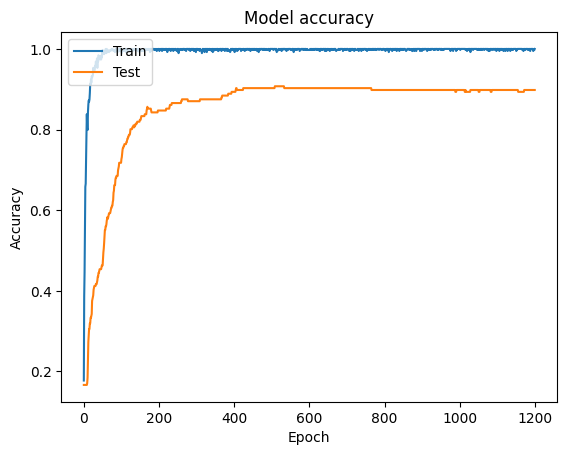

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import random
from tqdm import tqdm
import scipy.ndimage.interpolation as inter
from scipy.signal import medfilt
from scipy.spatial.distance import cdist
from keras.regularizers import l2

from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.layers.core import *
from tensorflow.keras.callbacks import *
from keras.layers.convolutional import *
import tensorflow as tf

import numpy as np
import math
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import glob
import gc

from tqdm import tqdm
import pickle

from keras.optimizers import *
from keras.models import Model
from keras.layers import *
from keras.layers.core import *
from keras.layers.convolutional import *
from keras import backend as K
import keras
import tensorflow as tf

#Initialize the setting
random.seed(1234)

class Config():
    def __init__(self):
        self.frame_l = 30 # the length of frames
        self.joint_n = 17 # the number of joints
        self.joint_d = 2 # the dimension of joints
        self.clc_num = 6 # the number of class
        self.feat_d = 136
        self.filters = 64


# Temple resizing function
def zoom(p,target_l=64,joints_num=33,joints_dim=2):
    l = p.shape[0]
    p_new = np.empty([target_l,joints_num,joints_dim])
    for m in range(joints_num):
        for n in range(joints_dim):
            p[:,m,n] = medfilt(p[:,m,n],3)
            p_new[:,m,n] = inter.zoom(p[:,m,n],target_l/l)[:target_l]
    return p_new

# Calculate JCD feature
def norm_scale(x):
    return (x-np.mean(x))/np.mean(x)

def get_CG(p,C):
    M = []
    iu = np.triu_indices(C.joint_n,1,C.joint_n)
    for f in range(C.frame_l):
        d_m = cdist(p[f],p[f],'euclidean')
        d_m = d_m[iu]
        M.append(d_m)
    M = np.stack(M)
    M = norm_scale(M)
    return M

# Genrate dataset
# def data_generator(T,C,le):
#     X_0 = []
#     X_1 = []
#     Y = []
#     for i in tqdm(range(len(T['pose']))):
#         p = np.copy(T['pose'][i])
#         p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)

#         label = np.zeros(C.clc_num)
#         label[le.transform(T['label'])[i]-1] = 1

#         M = get_CG(p,C)

#         X_0.append(M)
#         X_1.append(p)
#         Y.append(label)

#     X_0 = np.stack(X_0)
#     X_1 = np.stack(X_1)
#     Y = np.stack(Y)
#     return X_0,X_1,Y

def data_generator(T,C,le,labels):
    X_0 = []
    X_1 = []
    Y = []
    for i in tqdm(range(len(T))):
        p = np.copy(T[i])
        p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)
        label = np.zeros(C.clc_num)
        print(len(le.transform(labels)))
        label[le.transform(labels)[i]-1] = 1

        M = get_CG(p,C)

        X_0.append(M)
        X_1.append(p)
        Y.append(label)

    X_0 = np.stack(X_0)
    X_1 = np.stack(X_1)
    Y = np.stack(Y)
    return X_0,X_1,Y




#Building the model
def poses_diff(x):
    H, W = x.get_shape()[1],x.get_shape()[2]
    x = tf.subtract(x[:,1:,...],x[:,:-1,...])
    x = tf.image.resize(x,size=[H,W])
    return x

def pose_motion(P,frame_l):
    P_diff_slow = Lambda(lambda x: poses_diff(x))(P)
    P_diff_slow = Reshape((frame_l,-1))(P_diff_slow)
    P_fast = Lambda(lambda x: x[:,::2,...])(P)
    P_diff_fast = Lambda(lambda x: poses_diff(x))(P_fast)
    P_diff_fast = Reshape((int(frame_l/2),-1))(P_diff_fast)
    return P_diff_slow,P_diff_fast

def c1D(x,filters,kernel):
    x = Conv1D(filters, kernel_size=kernel,padding='same',use_bias=False, kernel_regularizer=l2(0.005))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def block(x,filters):
    x = c1D(x,filters,3)
    x = c1D(x,filters,3)
    return x

def d1D(x,filters):
    x = Dense(filters,use_bias=False, kernel_regularizer=l2(0.005))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)
    return x

def build_FM(frame_l=30,joint_n=33,joint_d=2,feat_d=231,filters=16):
    M = Input(shape=(frame_l,feat_d))
    P = Input(shape=(frame_l,joint_n,joint_d))

    diff_slow,diff_fast = pose_motion(P,frame_l)

    x = c1D(M,filters*2,1)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,3)
    x = SpatialDropout1D(0.1)(x)
    x = c1D(x,filters,1)
    x = MaxPooling1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x_d_slow = c1D(diff_slow,filters*2,1)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,3)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)
    x_d_slow = c1D(x_d_slow,filters,1)
    x_d_slow = MaxPool1D(2)(x_d_slow)
    x_d_slow = SpatialDropout1D(0.1)(x_d_slow)

    x_d_fast = c1D(diff_fast,filters*2,1)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,3)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)
    x_d_fast = c1D(x_d_fast,filters,1)
    x_d_fast = SpatialDropout1D(0.1)(x_d_fast)

    x = concatenate([x,x_d_slow,x_d_fast])
    x = block(x,filters*2)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x = block(x,filters*4)
    x = MaxPool1D(2)(x)
    x = SpatialDropout1D(0.1)(x)

    x = block(x,filters*8)
    x = SpatialDropout1D(0.1)(x)

    return Model(inputs=[M,P],outputs=x)


def build_DD_Net(C):
    M = Input(name='M', shape=(C.frame_l,C.feat_d))
    P = Input(name='P', shape=(C.frame_l,C.joint_n,C.joint_d))

    FM = build_FM(C.frame_l,C.joint_n,C.joint_d,C.feat_d,C.filters)

    x = FM([M,P])

    x = GlobalMaxPool1D()(x)

    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = d1D(x,128)
    x = Dropout(0.5)(x)
    x = Dense(C.clc_num, activation='softmax')(x)

    ######################Self-supervised part
    model = Model(inputs=[M,P],outputs=x)
    return model


#Test in real time
# def data_generator_rt(T,C):
#     X_0 = []
#     X_1 = []

#     T = np.expand_dims(T, axis = 0)
#     for i in tqdm(range(len(T))):
#         p = np.copy(T[i])
#         p = zoom(p,target_l=C.frame_l,joints_num=C.joint_n,joints_dim=C.joint_d)

#         M = get_CG(p,C)

#         X_0.append(M)
#         X_1.append(p)

#     X_0 = np.stack(X_0)
#     X_1 = np.stack(X_1)

#     return X_0,X_1

In [ ]:
C = Config()
DD_Net = build_DD_Net(C)
DD_Net.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 M (InputLayer)                 [(None, 30, 136)]    0           []                               
                                                                                                  
 P (InputLayer)                 [(None, 30, 17, 2)]  0           []                               
                                                                                                  
 model_20 (Functional)          (None, 3, 512)       1719808     ['M[0][0]',                      
                                                                  'P[0][0]']                      
                                                                                                  
 global_max_pooling1d_10 (Globa  (None, 512)         0           ['model_20[0][0]']        

In [ ]:
lr = 1e-3
DD_Net.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(lr),metrics=['accuracy'])
lrScheduler = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, cooldown=5, min_lr=1e-5)
history = DD_Net.fit([X_0,X_1],Y,
                    batch_size=len(Y),
                    epochs=1200,
                    verbose=True,
                    shuffle=True,
                    callbacks=[lrScheduler],
                    validation_data=([X_val_0,X_val_1],Y_val)
                    )

Epoch 1/1200
1/1 [==============================] - 5s 5s/step - loss: 15.2683 - accuracy: 0.1488 - val_loss: 14.5605 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 2/1200
1/1 [==============================] - 0s 91ms/step - loss: 14.5822 - accuracy: 0.3577 - val_loss: 14.8767 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 3/1200
1/1 [==============================] - 0s 90ms/step - loss: 14.3315 - accuracy: 0.4517 - val_loss: 15.3302 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 4/1200
1/1 [==============================] - 0s 94ms/step - loss: 14.1294 - accuracy: 0.5170 - val_loss: 15.5719 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 5/1200
1/1 [==============================] - 0s 93ms/step - loss: 13.8915 - accuracy: 0.6580 - val_loss: 15.7569 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 6/1200
1/1 [==============================] - 0s 97ms/step - loss: 13.7116 - accuracy: 0.6475 - val_loss: 15.9614 - val_accuracy: 0.1713 - lr: 0.0010
Epoch 7/1200
1/1 [==============================] - 0s 93ms/step -

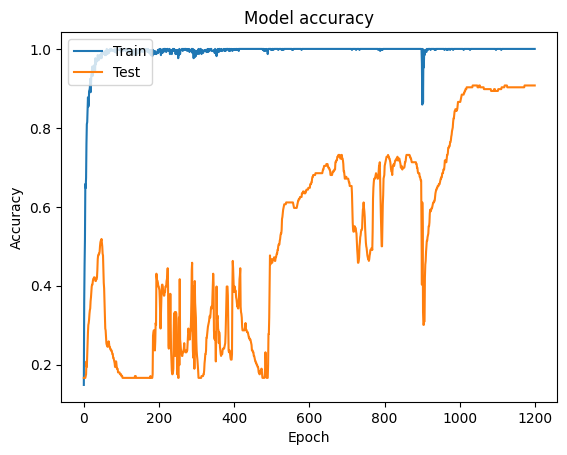

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()